<a href="https://colab.research.google.com/github/Equipe16-IAA/IAA009---Deep-Learning/blob/main/RNN/RNN_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importação da biblioteca

In [1]:
# Importação das Bibliotecas
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

##Carga da base

In [2]:
# carrega e arruma a base
!wget http://www.razer.net.br/datasets/spam.csv
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df.head()
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ["labels", "data"]
df["b_labels"] = df["labels"].map({ "ham": 0, "spam": 1})
y = df["b_labels"].values

--2024-07-27 14:42:04--  http://www.razer.net.br/datasets/spam.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.24MB/s    in 0.4s    

2024-07-27 14:42:05 (1.24 MB/s) - ‘spam.csv’ saved [503663/503663]



##Separação de treino e teste

In [3]:
# Separa a base em treino e teste
x_train, x_test, y_train, y_test = train_test_split(df["data"], y,
test_size=0.33)

##Tokenização dos dados

In [4]:
# Número máximo de palavras para considerar
# São consideradas as mais frequentes, as demais são
# ignoradas
num_words = 20000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)
word2index = tokenizer.word_index
V = len(word2index)
print("%s tokens" % V)

7122 tokens


##Acertando o tamanho (Padding)

In [5]:
# Acerta o tamanho das sequências (padding)
data_train = pad_sequences(sequences_train) # usa o tamanho da maior seq.
T = data_train.shape[1] # tamanho da sequência
data_test = pad_sequences(sequences_test, maxlen=T)
print("data_train.shape: ", data_train.shape)
print("data_test.shape: ", data_test.shape)

data_train.shape:  (3733, 189)
data_test.shape:  (1839, 189)


##Definição do modelo da RNN

In [6]:
# Define o modelo
D = 20 # tamanho do embedding, hiperparâmetro que pode ser escolhido
M = 5 # tamanho do hidden state, quantidade de unidades LSTM
i = Input(shape=(T,)) # Entra uma frase inteira
x = Embedding(V+1, D)(i)
x = LSTM(M)(x)
x = Dense(1, activation="sigmoid")(x) # Sigmoide pois só tem 2 valores
model = Model(i, x)

##Visualização do modelo criado

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 189)]             0         
                                                                 
 embedding (Embedding)       (None, 189, 20)           142460    
                                                                 
 lstm (LSTM)                 (None, 5)                 520       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 142986 (558.54 KB)
Trainable params: 142986 (558.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Compilar e Treinar o modelo

In [8]:
# Compila e treina o modelo
model.compile(loss="binary_crossentropy", optimizer="adam",
metrics=["accuracy"])
epochs = 5
r = model.fit(data_train, y_train, epochs=epochs, validation_data=(data_test,
y_test))

Epoch 1/5
117/117 [==============================] - 20s 142ms/step - loss: 0.5134 - accuracy: 0.8495 - val_loss: 0.3332 - val_accuracy: 0.8651
Epoch 2/5
117/117 [==============================] - 6s 50ms/step - loss: 0.2217 - accuracy: 0.9445 - val_loss: 0.1696 - val_accuracy: 0.9723
Epoch 3/5
117/117 [==============================] - 6s 49ms/step - loss: 0.1309 - accuracy: 0.9863 - val_loss: 0.1243 - val_accuracy: 0.9821
Epoch 4/5
117/117 [==============================] - 3s 28ms/step - loss: 0.0908 - accuracy: 0.9933 - val_loss: 0.0993 - val_accuracy: 0.9853
Epoch 5/5
117/117 [==============================] - 3s 24ms/step - loss: 0.0652 - accuracy: 0.9965 - val_loss: 0.0809 - val_accuracy: 0.9869


##Função de perda e acurácia

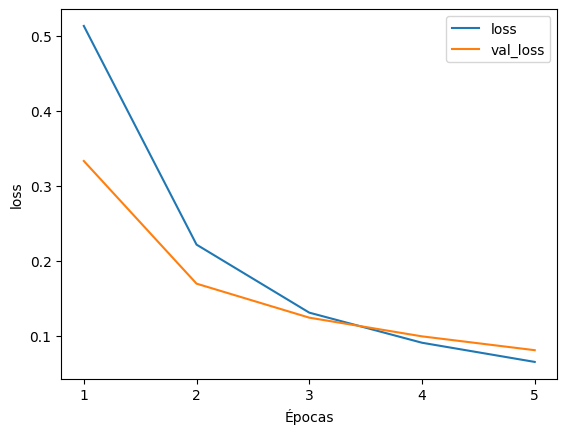

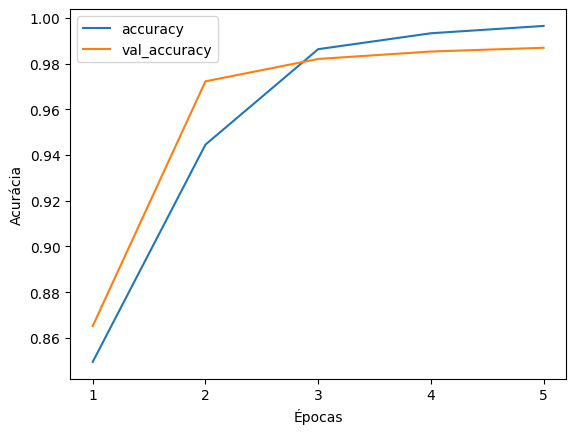

In [9]:
# Plota função de perda e acurácia
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.xlabel("Épocas")
plt.ylabel("loss")
plt.xticks(np.arange(0, epochs, step=1), labels=range(1, epochs+1))
plt.legend()
plt.show()
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.xticks(np.arange(0, epochs, step=1), labels=range(1, epochs+1))
plt.legend()
plt.show()

##Predição de um novo texto

In [10]:
# Efetua a predição de um texto novo
#texto = "Hi, my name is Razer and want to tell you something."
texto = "Is your car dirty? Discover our new product. Free for all. Click the link."
seq_texto = tokenizer.texts_to_sequences([texto]) # Tokeniza
data_texto = pad_sequences(seq_texto, maxlen=T) # Padding
pred = model.predict(data_texto) # Predição
print(pred)
print ("SPAM" if pred >= 0.5 else "OK")

1/1 [==============================] - 1s 548ms/step
[[0.6523792]]
SPAM
